<a href="https://colab.research.google.com/github/aymericvie/Covid19_coevolution/blob/main/Covid_coevolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-1.    -0.778 -0.556 -0.333 -0.111  0.111  0.333  0.556  0.778  1.
  0.   ]
Current time: 0/14 with 26.0 new cases today
Current time: 1/14 with 68.0 new cases today
Current time: 2/14 with 179.0 new cases today
Current time: 3/14 with 471.0 new cases today
Current time: 4/14 with 1239.0 new cases today
Current time: 5/14 with 3258.0 new cases today
Current time: 6/14 with 8565.0 new cases today
Current time: 7/14 with 22523.0 new cases today
Current time: 8/14 with 59237.0 new cases today
Current time: 9/14 with 155824.0 new cases today
Current time: 10/14 with 410023.0 new cases today


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:416: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:342: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


Current time: 11/14 with 1079356.0 new cases today
Current time: 12/14 with 2842996.0 new cases today
Current time: 13/14 with 7494681.0 new cases today
Current time: 14/14 with 19781777.0 new cases today
[2.63, 2.63, 2.63, 2.63, 2.63, 2.6291928974979824, 2.709283814200941, 2.6295589284556016, 2.6300937313462285, 2.6305458300274043, 2.711314160705524, 2.7124275060992513, 2.7139702686910825, 2.7161907696434766, 2.719439494489497]


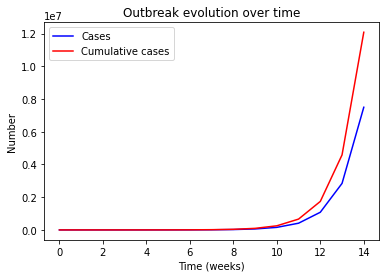

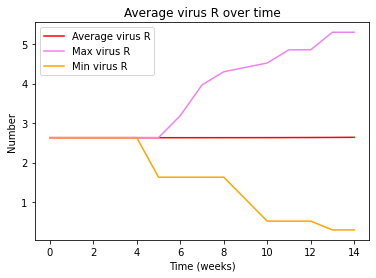

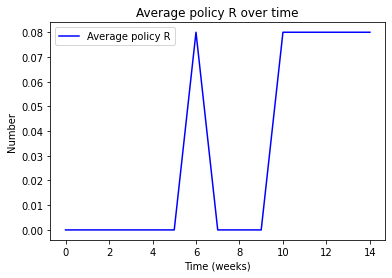

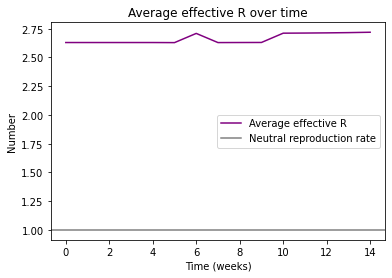

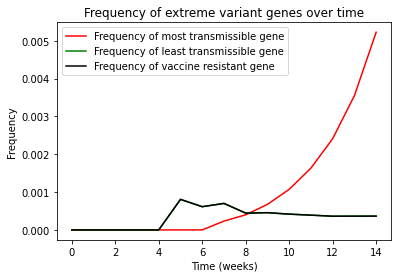

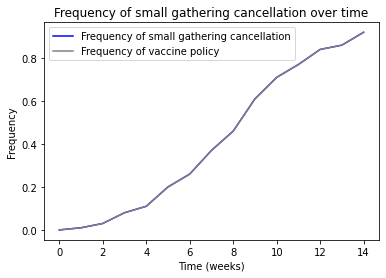

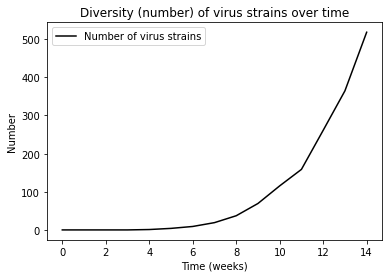

In [15]:
# imports
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from itertools import cycle 
np.set_printoptions(precision=3, suppress=True)
random.seed(9)

# Variable parameters
vaccine_mode = 0
vaccine_rollout = 0
vaccine_only = 0
population_policy_size = 100
tmax = 30
crossover_rate_policy = 0.9
mutation_rate_virus = 0.00000001
mutation_rate_policy = 0.05
detrimental_policy = 1


  

def coevolution(vaccine_mode, vaccine_rollout, vaccine_only, population_policy_size, tmax, crossover_rate_policy, mutation_rate_virus, mutation_rate_policy,detrimental_policy):
    # Fixed parameters
    virus_size = 10
    initial_virus_population = 10
    #https://www.bmj.com/content/369/bmj.m1891
    #baseR = round(random.uniform(2,3),2)
    baseR=2.63



    mut = np.arange(-1,1+1/10,(2/(virus_size-1)))
    
    if vaccine_mode == 1:
      mut=np.hstack([mut,0])
      virus_size += 1
    print(mut)

    policy_size = 46
    if vaccine_mode == 1:
      policy_size += 1
      

    # Parameters for non pharmaceutical interventions (NPIs) from Haug et al (2020)
    npi = [round(random.uniform(-0.36,-0.18),2), round(random.uniform(-0.24,-0.16),2), round(random.uniform(-0.26,-0.08),2), round(random.uniform(-0.16,-0.08),2), round(random.uniform(-0.16,-0.04),2), round(random.uniform(-0.18,0),2)]
    npi = npi + [round(random.uniform(-0.36,0),2),round(random.uniform(-0.28,0),2),round(random.uniform(-0.2,0.1),2),round(random.uniform(-0.2,0.05),2)]
    # measures for special populations
    npi= npi + [round(random.uniform(-0.22,0),2),round(random.uniform(-0.2,0.02),2),round(random.uniform(-0.3,0.02),2),round(random.uniform(-0.16,0),2),round(random.uniform(-0.22,0),2)]
    # increase in medical supplies and equipment
    npi= npi + [round(random.uniform(-0.2,0),2),round(random.uniform(-0.18,0),2),round(random.uniform(-0.16,0),2),round(random.uniform(-0.24,0),2),round(random.uniform(-0.14,0),2)]
    # airport restriction
    npi= npi + [round(random.uniform(-0.34,0),2),round(random.uniform(-0.24,0.06),2),round(random.uniform(-0.18,0),2),round(random.uniform(-0.19,0),2),round(random.uniform(-0.22,0.08),2)]
    # research
    npi= npi + [round(random.uniform(-0.16,0),2),round(random.uniform(-0.08,0),2),round(random.uniform(-0.18,0.06),2),round(random.uniform(-0.08,0),2),round(random.uniform(-0.1,0),2)]
    # port qnd ship restrictions
    npi= npi + [round(random.uniform(-0.05,0.05),2),round(random.uniform(-0.02,0.02),2),round(random.uniform(-0.03,0),2),round(random.uniform(-0.06,0),2),round(random.uniform(-0.02,0),2)]
    # measures to ensure security of supply
    npi= npi + [round(random.uniform(-0.18,0),2),round(random.uniform(0,0.18),2),round(random.uniform(-0.24,0),2),round(random.uniform(-0.18,0),2),round(random.uniform(0,0.04),2)]
    #surveillance
    npi= npi + [round(random.uniform(-0.16,0),2),round(random.uniform(0,0.04),2),round(random.uniform(0,0.04),2),round(random.uniform(-0.06,0),2),round(random.uniform(-0.16,0),2),round(random.uniform(0,0.06),2)]

    if vaccine_mode == 1:
      npi = npi + [0]

    if vaccine_only == 1:
      npi = [0]
      policy_size = 1
      mutation_rate_policy = 0
      crossover_rate_policy = 0

    # draw npi every period to better reflect uncertainty and reduce bias? YES
    # source of bias/ new mutations do not open new ways to mutate + sum mutations = 0 and uniformly distributed, could be changed easily

    # Initial sampling for viruses
    population_viruses = np.zeros((initial_virus_population,virus_size))
    #print("initial pop virus")
    #print(population_viruses)

    # Initial sampling for policies
    population_policies = np.zeros((population_policy_size,policy_size))
    population_virus_size = initial_virus_population

   # print("initial pop policies")
    #print(population_policies)
    #print(baseR)

    t = 0
    # Initial results
    distribution_virus_best_genome = []
    distribution_virus_worst_genome = []
    distribution_policy_genome = np.mean(population_policies,0)
    virusR_history = []
    policyR_history = []
    cases = []
    cumulative_cases = []
    virus_diversity = []
    virusR_max_history = []
    virusR_min_history = []
    if vaccine_mode ==1:
      distribution_virus_resistant_genome = []

    

    # Evolution process
    while t < tmax+1:

      vaccine_frequency = vaccine_rollout * t
      i = 0
      while i < vaccine_frequency:
        population_policies[i,policy_size-1] = 1
        i += 1

      # Draw measures efficiency
      #npi = [round(random.uniform(-0.36,-0.18),2), round(random.uniform(-0.24,-0.16),2), round(random.uniform(-0.26,-0.08),2), round(random.uniform(-0.16,-0.08),2), round(random.uniform(-0.16,-0.04),2), round(random.uniform(-0.18,0),2)]
      #npi = npi + [round(random.uniform(-0.36,0),2),round(random.uniform(-0.28,0),2),round(random.uniform(-0.2,0.1),2),round(random.uniform(-0.2,0.05),2)]
      #npi= npi + [round(random.uniform(-0.22,0),2),round(random.uniform(-0.2,0.02),2),round(random.uniform(-0.3,0.02),2),round(random.uniform(-0.16,0),2),round(random.uniform(-0.22,0),2)]
      #npi= npi + [round(random.uniform(-0.2,0),2),round(random.uniform(-0.18,0),2),round(random.uniform(-0.16,0),2),round(random.uniform(-0.24,0),2),round(random.uniform(-0.14,0),2)]
      #npi= npi + [round(random.uniform(-0.34,0),2),round(random.uniform(-0.24,0.06),2),round(random.uniform(-0.18,0),2),round(random.uniform(-0.19,0),2),round(random.uniform(-0.22,0.08),2)]
      #npi= npi + [round(random.uniform(-0.16,0),2),round(random.uniform(-0.08,0),2),round(random.uniform(-0.18,0.06),2),round(random.uniform(-0.08,0),2),round(random.uniform(-0.1,0),2)]
      #npi= npi + [round(random.uniform(-0.05,0.05),2),round(random.uniform(-0.02,0.02),2),round(random.uniform(-0.03,0),2),round(random.uniform(-0.06,0),2),round(random.uniform(-0.02,0),2)]
      #npi= npi + [round(random.uniform(-0.18,0),2),round(random.uniform(0,0.18),2),round(random.uniform(-0.24,0),2),round(random.uniform(-0.18,0),2),round(random.uniform(0,0.04),2)]
      #npi= npi + [round(random.uniform(-0.16,0),2),round(random.uniform(0,0.04),2),round(random.uniform(0,0.04),2),round(random.uniform(-0.06,0),2),round(random.uniform(-0.16,0),2),round(random.uniform(0,0.06),2)]

      #start_time = time.time()
      # determine efficacy of population viruses and policies
      if t == 0:
        unique, counts = np.unique(population_viruses, axis = 0, return_counts=True)
      #virusR = np.zeros((population_virus_size,1))
      #print("unique shape" + str(unique.shape[0]))
      virusR = np.zeros((unique.shape[0],1))
      i = 0
      while i < unique.shape[0]:
        #print(unique)
        #print(mut)
        virusR[i,0] = baseR + np.dot(unique[i,],mut) #np.sum(unique, axis = 1)[i]
        i += 1
      #print("virusR is" + str(virusR))
      #print("Evaluation of virusR" + "--- %s seconds ---" % (time.time() - start_time))

      
      policyR = np.zeros((population_policy_size,1))
      i = 0
      while i < population_policy_size:
        policyR[i,0] = np.dot(population_policies[i,],npi)
        i += 1
      #print("Evaluation of policyR" + "--- %s seconds ---" % (time.time() - start_time))

      # evaluate coevolution fitness evaluation for policies, with tournament(3) selection
      policy_fitness = np.zeros((population_policy_size,1))

      #start_time = time.time()

      #print(unique)
      #print(counts)
      i = 0
      while i < population_policy_size:
        cumulative_number_variant = np.zeros(counts.shape)
        #print(cumulative_number_variant)

        #print(counts)
        #print(unique.shape[0])
        #print(len(cumulative_number_variant))

        if unique.shape[0] > 1:
          j = 0
          while j < len(cumulative_number_variant):
            cumulative_number_variant[j] += counts[j] + cumulative_number_variant[j-1]
            j += 1
        #print(unique.shape[0])
        #a = random.randint(0,counts.shape[0]-1)
        a = random.randint(0,cumulative_number_variant[len(cumulative_number_variant)-1])

        aa = 0
        while a > cumulative_number_variant[aa]:
          aa += 1

        b = random.randint(0,cumulative_number_variant[len(cumulative_number_variant)-1])
        bb = 0
        while b > cumulative_number_variant[bb]:
          bb += 1

        c = random.randint(0,cumulative_number_variant[len(cumulative_number_variant)-1])
        cc = 0
        while c > cumulative_number_variant[cc]:
          cc += 1
        effective_policyR = np.copy(policyR)

        if vaccine_mode == 1:
          if population_policies[i,policy_size-1] == 1: #if this ith policy has the vaccine trait
            #unless they are vaccine resistent, the virusR count has being 0
            virusR_aa_revised = virusR[aa,0]
            virusR_bb_revised = virusR[bb,0]
            virusR_cc_revised = virusR[cc,0]

            if unique[aa,virus_size-1] == 0:
              effective_policyR[i,0] += virusR_aa_revised
              virusR_aa_revised = 0
            if unique[bb,virus_size-1] == 0:
              effective_policyR[i,0] += virusR_bb_revised
              virusR_bb_revised = 0
            if unique[cc,virus_size-1] == 0:
              effective_policyR[i,0] += virusR_cc_revised
              virusR_cc_revised = 0
            policy_fitness[i,0] = max((1/3)*(virusR_aa_revised + virusR[bb,0] + virusR[cc,0]) + policyR[i,0],0)
            

          elif population_policies[i,policy_size-1] == 0:
            policy_fitness[i,0] = max((1/3)*(virusR[aa,0] + virusR[bb,0] + virusR[cc,0]) + policyR[i,0],0)

        if vaccine_mode == 0:
          policy_fitness[i,0] = max((1/3)*(virusR[aa,0] + virusR[bb,0] + virusR[cc,0]) + policyR[i,0],0)
        i += 1
      adjusted_policy_fitness = 1/(1+policy_fitness)
      policy_selection = adjusted_policy_fitness / np.sum(adjusted_policy_fitness)
      #print("Evaluation of policyR fitness vs virusR" + "--- %s seconds ---" % (time.time() - start_time))

      #start_time = time.time()
      cumulative_policy_selection = np.copy(policy_selection)
      i = 1
      while i < len(cumulative_policy_selection):
        cumulative_policy_selection[i,0] += cumulative_policy_selection[i-1,0]
        i += 1

      i = 0
      while i < population_policy_size:
        a = random.uniform(0,1)
        b = 0
        while a > cumulative_policy_selection[b]:
            b += 1

        a = random.uniform(0,1)
        c = 0
        while a > cumulative_policy_selection[c]:
            c += 1

      # Do crossover between elements b and c

        offspring1 = np.zeros((1, policy_size))
        offspring2 = np.zeros((1, policy_size))

        n = random.uniform(0,1)
        if n <= crossover_rate_policy:

          cpoint = random.randint(0,policy_size)
          j = 0
          while j < cpoint:
            offspring1[0,j] = population_policies[b,j]
            offspring2[0,j] = population_policies[c,j]
            j += 1
          while j < policy_size:
            offspring1[0,j] = population_policies[c,j]
            offspring2[0,j] = population_policies[b,j]
            j += 1

          if vaccine_mode == 1:
            # we set that vaccine cannot be transmitted by crossover to keep control on rollout
            if offspring1[0,policy_size-1] == 1:
              offspring1[0,policy_size-1] = 0
            if offspring2[0,policy_size-1] == 1:
              offspring2[0,policy_size-1] = 0

        elif n > crossover_rate_policy:
          offspring1 = np.copy(population_policies[b,])
          offspring2 = np.copy(population_policies[c,])
          offspring2 = offspring2.reshape((1,policy_size))
          offspring1 = offspring1.reshape((1,policy_size))
        
        if vaccine_mode == 0:
          k = 0
          while k < policy_size:
            n = random.uniform(0,1)
            if n <= mutation_rate_policy:
              if offspring2[0,k] == 0:
                offspring2[0,k] = 1
              elif offspring2[0,k] == 1:
                offspring2[0,k] = 0
            k += 1

        if vaccine_mode == 1:
          k = 0
          while k < policy_size-2:
            n = random.uniform(0,1)
            if n <= mutation_rate_policy:
              if offspring2[0,k] == 0:
                offspring2[0,k] = 1
              elif offspring2[0,k] == 1:
                offspring2[0,k] = 0
            k += 1

        population_policies = np.vstack([population_policies,offspring1])
        population_policies = np.vstack([population_policies,offspring2])
        i += 2
      #print("Crossover qnd mutqtion of policyR" + "--- %s seconds ---" % (time.time() - start_time))

      #print("new pop polici")
      population_policies = population_policies[population_policy_size:, :]
      #print(population_policies)
      

      next_unique = np.copy(unique)
      next_counts = np.zeros((counts.shape))

      # operate virus transmission and mutation
      i = 0
      #population_virus_mut = np.zeros((1,virus_size))
      while i < unique.shape[0]:
        j = 0
        #print("virusR + policyR,effective R times count, int round it")
       # print(virusR[i,0]+np.mean(policyR))
        #print((virusR[i,0]+np.mean(policyR))*counts[i])
        #print(max(int(round((virusR[i,0]+np.mean(policyR))*counts[i])),0))
        m = max(int(round((virusR[i,0]+np.mean(policyR))*counts[i])),0)
        #print("replic number, mut number")
        #print(m * (1 - mutation_rate_virus))
        #print(round(m * (1 - mutation_rate_virus)))
        # and now m * (1 - mutation_rate) are just similar, we record their weights and will update counts later. They don't change unique!
        next_counts[i] += round(m * (1 - mutation_rate_virus))
       # print("new count added")
        #print(next_counts)
        #start_time = time.time()
        # Proportion m  * mutation_rate_virus will mutate
        #print(m*mutation_rate_virus)
        #print(round(m*mutation_rate_virus))
        while j < round(m*mutation_rate_virus):
          candidate_virus = np.copy(unique[i,])
          k = 0
          while k < virus_size:
            n = random.uniform(0,1)
            if n <= 1/virus_size:
              if candidate_virus[k] == 0:
                candidate_virus[k] = 1
              elif candidate_virus[k] == 1:
                candidate_virus[k] = 0
            k += 1
          #print("mutqtion and replication of virus" + "--- %s seconds ---" % (time.time() - start_time))
          
          if any((next_unique[:]==candidate_virus).all(1)):
            z = np.asscalar(np.where((next_unique == candidate_virus).all(axis=1))[0])
            next_counts[z] += 1

          if not any((next_unique[:]==candidate_virus).all(1)):
            next_unique = np.vstack([next_unique, candidate_virus]) 
            next_counts = np.hstack([next_counts, 1])
            #print("new variant detected"+str(candidate_virus))
            #print(next_unique)
            #print(next_counts)
          j += 1

        i += 1
      

      #print("shape of counts " + str(next_counts.shape[0]) + " shape of unique" + str(next_unique.shape[0]))
      #print(next_counts)
      #print(next_unique)


      # what are those good for?
      population_viruses = population_viruses[population_virus_size:, :]
      population_virus_size = population_viruses.shape[0]
      #print("Virus pop size "+str(population_virus_size))

      # Save results
      if t > 0:
        distribution_policy_genome = np.vstack([distribution_policy_genome,np.mean(population_policies,0)]) 
      #distribution_virus_genome = np.vstack([distribution_virus_genome,np.mean(population_viruses,0)]) 
        #################################################################
      counts_high_mutation = 0
      i = 0
      if vaccine_mode == 0:
        while i < len(counts):
          if unique[i,virus_size-1] == 1:
            counts_high_mutation += counts[i]
          i += 1
      if vaccine_mode == 1:
        while i < len(counts):
          if unique[i,virus_size-2] == 1:
            counts_high_mutation += counts[i]
          i += 1
      frequency_high_mutation = counts_high_mutation / np.sum(counts)
      distribution_virus_best_genome.append(frequency_high_mutation)

      counts_high_mutation = 0
      i = 0
      while i < len(counts):
        if unique[i,0] == 1:
          counts_high_mutation += counts[i]
        i += 1
      frequency_high_mutation = counts_high_mutation / np.sum(counts)
      distribution_virus_worst_genome.append(frequency_high_mutation)

      if vaccine_mode == 1:
        while i < len(counts):
          if unique[i,virus_size-1] == 1:
            counts_high_mutation += counts[i]
          i += 1
        frequency_high_mutation = counts_high_mutation / np.sum(counts)
        distribution_virus_resistant_genome.append(frequency_high_mutation)


      #print("counts, virusR, virus4history,unique, sum_virusR")
      #print(counts)
      #print(virusR)
      #print(unique)
      #virusR_history.append((1/np.sum(counts))*(np.dot(counts,virusR),2))
      #virusR_history.append(np.asscalar((1/np.sum(counts))*(counts * virusR)))
      sum_virusR = 0
      i = 0
      while i < len(counts):
        sum_virusR += counts[i] * virusR[i,0]
        i += 1
      #print(sum_virusR)
      virusR_history.append(np.asscalar((1/np.sum(counts)*sum_virusR)))
      #print(virusR_history)
      #virusR_history=np.asscalar(virusR_history)
      #print(virusR_history)
      virusR_max_history.append(max(virusR))
      virusR_min_history.append(min(virusR))


      #policyR_history.append(round(np.mean(policyR),2))
      policyR_history.append(round(np.mean(effective_policyR),2))

      cases.append(np.sum(counts))
      cumulative_cases.append(np.sum(cases))

      #print(unique)
      #print(counts)

      unique = np.copy(next_unique)
      counts = np.copy(next_counts)

      #unique, counts = np.unique(population_viruses, axis = 0, return_counts=True)
      virus_diversity.append(unique.shape[0])

      #Remove unique variants that are no longer presents
      #start_time = time.time()
      
      i = 0
      #print(unique)
      #print(counts)
      #print( "error in counts in "+ str(np.where((counts == 0))))
      while i < len(counts):
        if counts[i] == 0:
          #print("i " + str(i))
          counts = np.delete(counts, i, axis = 0)
          unique = np.delete(unique, i, axis = 0)
          #print("deleted "+str(i))
          #print(counts)
          #print(unique)
          i = 0
        elif counts[i] != 0:
          i += 1
      #print("remove non uniques" + "--- %s seconds ---" % (time.time() - start_time))
      
      #np.delete(unique,  np.where((counts == 0)), axis =0)
      #np.delete(counts,  np.where((counts == 0)), axis = 1)
      #print(unique)
      #print(counts)

      print("Current time: " + str(t)+"/"+str(tmax) + " with " + str(np.sum(counts)) + " new cases today")
      if np.sum(counts) == 0:
        print("virus extinct")
        tmax = t
        break
      t += 1
    del t

    #print(distribution_policy_genome)
    # Graphical results
    timer = list(range(0,tmax+1))

    effectiveR = [sum(x) for x in zip(virusR_history, policyR_history)]           # when adding the vaccine, neeed a way to count vaccine effect in effective R rate
    print(effectiveR)

    # cases and cumulative cases
    plt.plot(timer, cases, label = "Cases", color = "blue")
    plt.plot(timer, cumulative_cases, label = "Cumulative cases", color = "red")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Number')
    plt.title('Outbreak evolution over time')
    plt.legend()
    plt.show()

    # evolution of average virus R
    plt.plot(timer, virusR_history,color = "red", label ="Average virus R")
    plt.plot(timer, virusR_max_history,color = "violet", label ="Max virus R")
    plt.plot(timer, virusR_min_history,color = "orange", label ="Min virus R")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Number')
    plt.title('Average virus R over time')
    plt.legend()
    plt.show()

    # evolution of policy virus R
    plt.plot(timer, policyR_history,color = "blue", label ="Average policy R")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Number')
    plt.title('Average policy R over time')
    plt.legend()
    plt.show()

    # evolution of policy virus R
    plt.plot(timer, effectiveR,color = "purple", label ="Average effective R")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Number')
    plt.axhline(y=1,color="gray",label="Neutral reproduction rate")
    plt.title('Average effective R over time')
    plt.legend()
    plt.show()

    # evolution of highest R mutation variant
    plt.plot(timer, distribution_virus_best_genome,color = "red", label ="Frequency of most transmissible gene")
    plt.plot(timer, distribution_virus_worst_genome,color = "green", label ="Frequency of least transmissible gene")
    if vaccine_mode ==1:
      plt.plot(timer, distribution_virus_resistant_genome,color = "black", label ="Frequency of vaccine resistant gene")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Frequency')
    plt.title('Frequency of extreme variant genes over time')
    plt.legend()
    plt.show()

    # evolution of best policy measure (small gathering cancellation)
    plt.plot(timer, distribution_policy_genome[:,0],color = "blue", label ="Frequency of small gathering cancellation")
    if vaccine_mode == 1:
      plt.plot(timer, distribution_policy_genome[:,policy_size-1],color = "gray", label ="Frequency of vaccine policy")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Frequency')
    plt.title('Frequency of small gathering cancellation over time')
    plt.legend()
    plt.show()

    # Evolution of virus variants number
    plt.plot(timer, virus_diversity,color = "black", label ="Number of virus strains")
    plt.xlabel('Time (weeks)')
    plt.ylabel('Number')
    plt.title('Diversity (number) of virus strains over time')
    plt.legend()
    plt.show()

    #print(sum(npi))
    #print(sum(mut))
    #def theSum(aList):
    # s = 0 
    #  for x in aList:
    #      if x > 0:
    #          s = s + x
    #  return s

    #print(theSum(mut)+baseR)

    #print(unique)
    #print(virusR)
    #print(counts)

    #print(population_policies)


vaccine_mode = 1
population_policy_size= 100
tmax = 14
crossover_rate_policy = 0.1
mutation_rate_virus = 0.001 #0.0001 #0.009 
mutation_rate_policy = 0.9
detrimental_policy = 0
vaccine_rollout = 1
vaccine_only = 1

coevolution(vaccine_mode, vaccine_rollout, vaccine_only, population_policy_size, tmax, crossover_rate_policy, mutation_rate_virus, mutation_rate_policy,detrimental_policy)


#print("scenqrio where policy does not evolve")
#coevolution(vaccine_mode, population_policy_size, tmax, 0, mutation_rate_virus, 0,detrimental_policy)

#print("scenqrio where virus does not evolve")
#coevolution(vaccine_mode, population_policy_size, tmax, crossover_rate_policy, 0, mutation_rate_policy,detrimental_policy)






In [74]:
virus_size = 10
mut = np.arange(-1,1+1/10,(2/(virus_size-1)))
print(mut)

[-1.    -0.778 -0.556 -0.333 -0.111  0.111  0.333  0.556  0.778  1.   ]
